In [1]:
# importing required libraries 
import numpy as np

In [2]:
# Creating rosenbrock equation
def rosenbrock(X, a=1, b=100):
    x1, x2 = X
    return (a - x1)**2 + b *((x2 - x1**2)**2)

In [3]:
# Creating a Gradient of the function
def gradient(x1,x2):
  # Manually added a gradient of a function
  grad_f = np.array([-2+(2*x1)+(400*(x1**3)-(400*x1*x2)),(200*x2)-(200*(x1**2))])
  return grad_f

In [4]:
# Initialising 5 initial points
X0_list = []
for i in range(5):
  # Assigning values to seeds to create 5 random values
  np.random.seed(i)
  X0 = np.random.rand(2,1)
  print('initialised value:',i+1,X0)
  X0_list.append(X0)

initialised value: 1 [[0.5488135 ]
 [0.71518937]]
initialised value: 2 [[0.417022  ]
 [0.72032449]]
initialised value: 3 [[0.4359949 ]
 [0.02592623]]
initialised value: 4 [[0.5507979 ]
 [0.70814782]]
initialised value: 5 [[0.96702984]
 [0.54723225]]


In [5]:
no_of_iteration = 100000
t = 0.00125

In [10]:
# Initializing list to store minimum points on the curve and the iteration values
X_min = []
X_temp_init ={}


for j in range(len(X0_list)): # Making a loop of initialized points
  # Getting the initialized value from the list 
  X = X0_list[j] 
  # Empty list to store iterations during the loop
  X_temp = []
  for i in range(no_of_iteration): # Condition 1 : To not exceed more than 10^5 iterations
    grad = gradient(X[0],X[1]) # Calculating gradient values
    if np.linalg.norm(grad) >= 0.00001: # Condition 2 : If the norm of the gradient is less than 10^-5 or not
      X = (X - (t*grad)) # Updating the X parameter
      X_temp.append(X)
    else:
      X = X
      X_temp.append(X)
  X_min.append(X) # Adding the minimum value to the list
  X_temp_init[j+1] = X_temp # Adding all the iterations in the list

In [11]:
# Result
for i in range(5):
  print('For the initialised value of:',X0_list[i],'The minimum value(x*) is:',X_min[i])

For the initialised value of: [[0.5488135 ]
 [0.71518937]] The minimum value(x*) is: [[0.99998882]
 [0.9999776 ]]
For the initialised value of: [[0.417022  ]
 [0.72032449]] The minimum value(x*) is: [[0.99998882]
 [0.9999776 ]]
For the initialised value of: [[0.4359949 ]
 [0.02592623]] The minimum value(x*) is: [[0.99998882]
 [0.9999776 ]]
For the initialised value of: [[0.5507979 ]
 [0.70814782]] The minimum value(x*) is: [[0.99998882]
 [0.9999776 ]]
For the initialised value of: [[0.96702984]
 [0.54723225]] The minimum value(x*) is: [[0.99998882]
 [0.9999776 ]]


---


In [12]:
# Importing libraries for visualization
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

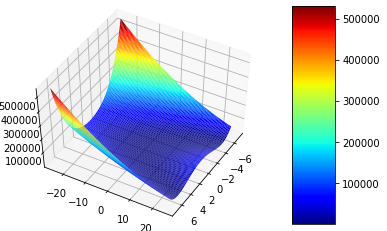

In [13]:
# Limiting the dimensions that needs to be visualized
x1 = np.linspace(-7, 7, 100)
x2 = np.linspace(-25, 25, 100)
X, Y = np.meshgrid(x1, x2)
Z = rosenbrock((X, Y))

# Creating a 3D plot of the function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(s, aspect=5)